In [ ]:
%pip install ultralytics
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn
%pip install tqdm.notebook
%pip install ray
%pip install flask tensorflow pillow numpy

  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  U

   ------------------------ ------------- 135.0/212.5 MB 253.8 kB/s eta 0:05:06
   ------------------------ ------------- 135.0/212.5 MB 253.8 kB/s eta 0:05:06
   ------------------------ ------------- 135.3/212.5 MB 255.8 kB/s eta 0:05:03
   ------------------------ ------------- 135.3/212.5 MB 255.8 kB/s eta 0:05:03
   ------------------------ ------------- 135.3/212.5 MB 255.8 kB/s eta 0:05:03
   ------------------------ ------------- 135.3/212.5 MB 255.8 kB/s eta 0:05:03
   ------------------------ ------------- 135.5/212.5 MB 260.2 kB/s eta 0:04:56
   ------------------------ ------------- 135.5/212.5 MB 260.2 kB/s eta 0:04:56
   ------------------------ ------------- 135.5/212.5 MB 260.2 kB/s eta 0:04:56
   ------------------------ ------------- 135.5/212.5 MB 260.2 kB/s eta 0:04:56
   ------------------------ ------------- 135.8/212.5 MB 262.1 kB/s eta 0:04:53
   ------------------------ ------------- 135.8/212.5 MB 262.1 kB/s eta 0:04:53
   ------------------------ ------------

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tqdm.notebook (from versions: none)
ERROR: No matching distribution found for tqdm.notebook


  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.7 MB 3.9 MB/s eta 0:00:07
   --- ------------------------------------ 2.1/25.7 MB 5.1 MB/s eta 0:00:05
   ---- ----------------------------------- 3.1/25.7 MB 4.5 MB/s eta 0:00:06
   ----- ---------------------------------- 3.7/25.7 MB 4.1 MB/s eta 0:00:06
   ------ --------------------------------- 3.9/25.7 MB 3.9 MB/s eta 0:00:06
   ------- -------------------------------- 4.7/25.7 MB 3.6 MB/s eta 0:00:06
   ------- -------------------------------- 5.0/25.7 MB 3.4 MB/s eta 0:00:07
   -------- ------------------------------- 5.2/25.7 MB 3.3 MB/s eta 0:00:07
   -------- ------------------------------- 5

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Seaborn grafiklerinin görsel görünümünü yapılandırın
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

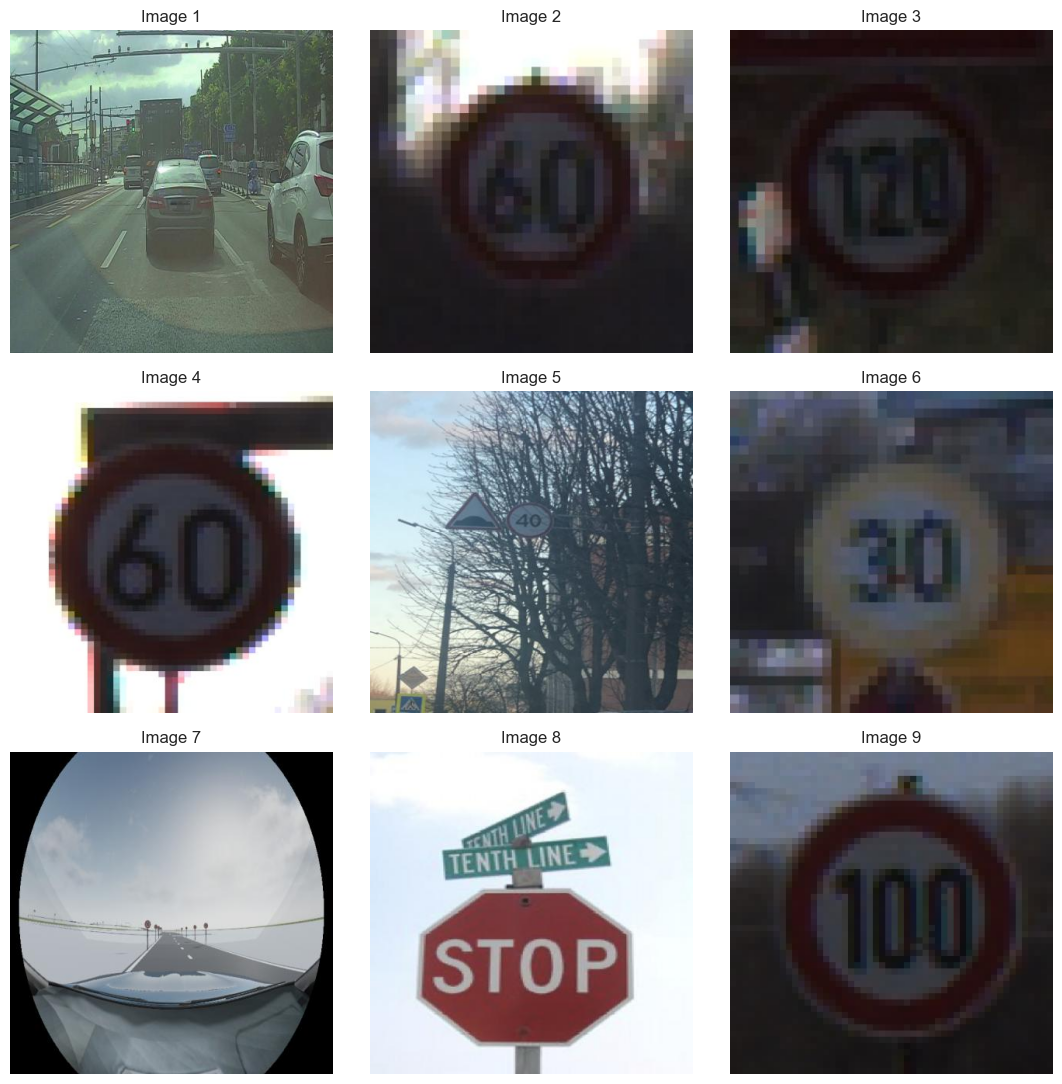

In [ ]:
Image_dir = r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\images"

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image = cv2.imread(r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\images\00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"Görselin boyutları {w}x{h} ve {c} kanaldır.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 9.03MB/s]



image 1/1 C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 62.8ms
Speed: 5.9ms preprocess, 62.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


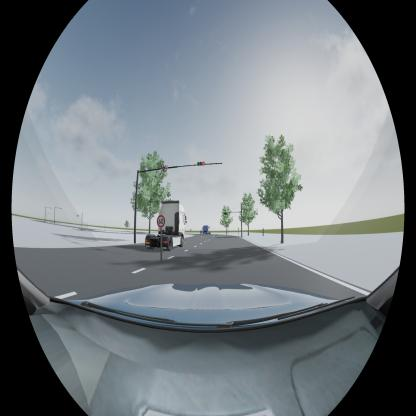

In [ ]:
model = YOLO("yolov8n.pt") 

image = r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [10]:
%pip install --upgrade ultralytics ray

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip uninstall torch torchvision torchaudio -y

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 11.8 MB/s eta 0:03:27
     ---------------------------------------- 0.0/2.4 GB 12.0 MB/s eta 0:03:25
     ---------------------------------------- 0.0/2.4 GB 8.2 MB/s eta 0:04:59
     ---------------------------------------- 0.0/2.4 GB 9.0 MB/s eta 0:04:32
     ---------------------------------------- 0.0/2.4 GB 10.5 MB/s eta 0:03:54
     ---------------------------------------- 0.0/2.4 GB 10.8 MB/s eta 0:03:45
     ---------------------------------------- 0.0/2.4 GB 10.7 MB/s eta 0:03:49
     ---------------------------------------- 0.0/2.4 GB 11.1 MB/s eta 0:03:40
     ---------------------------------------- 0.0/2.4 GB 11.3 MB/s eta 0:03:36
     ---------------------------------------- 0.0/2.4 GB 11.3 MB/s eta 0:03:35
     ------

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0))


CUDA Available: True
CUDA Device Count: 1
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [ ]:
Final_model = YOLO('yolov8n.pt')  

Result_Final_model = Final_model.train(data=r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\data.yaml",epochs = 30, batch = -1, optimizer = 'auto', device='cuda')

New https://pypi.org/project/ultralytics/8.3.121 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.116  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

100%|██████████| 5.35M/5.35M [00:00<00:00, 7.52MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 78.485.1 MB/s, size: 24.1 KB)


train: Scanning C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU) 4.00G total, 1.57G reserved, 0.18G allocated, 2.24G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3013773       8.209         0.692         53.23         80.49        (1, 3, 640, 640)                    list
     3013773       16.42         0.820           100            88        (2, 3, 640, 640)                    list
     3013773       32.84         1.118            30            36        (4, 3, 640, 640)                    list
     3013773       65.67         1.653            34            58        (8, 3, 640, 640)                    list
     3013773       131.3         2.716         63.59            93       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 3 for CUDA:0 2.72G/4.00G (68%) 
train: Fast image access  (ping: 0.10.0 ms, read: 103.340.8 MB/s, size: 26.0 KB)


train: Scanning C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.40.3 ms, read: 46.330.8 MB/s, size: 19.9 KB)


val: Scanning C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0004921875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.561G     0.8984      3.568      1.221          6        640: 100%|██████████| 1177/1177 [01:53<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.60it/s]

                   all        801        944      0.156      0.494      0.228      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.566G      0.818      2.725      1.144          7        640: 100%|██████████| 1177/1177 [01:34<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.61it/s]

                   all        801        944      0.252      0.505      0.303      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.586G     0.8076      2.353      1.131          2        640: 100%|██████████| 1177/1177 [01:32<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.36it/s]

                   all        801        944      0.313      0.537      0.349      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.586G     0.7947      2.089      1.113          3        640: 100%|██████████| 1177/1177 [01:31<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.57it/s]

                   all        801        944      0.317       0.58      0.426      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30     0.586G     0.7604      1.838      1.093          4        640: 100%|██████████| 1177/1177 [01:32<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 15.74it/s]

                   all        801        944      0.478      0.551      0.543       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30     0.586G     0.7382      1.653      1.082          5        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.72it/s]

                   all        801        944      0.622      0.645      0.677      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.586G     0.7211      1.506      1.073          1        640: 100%|██████████| 1177/1177 [01:35<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.34it/s]

                   all        801        944      0.731      0.681      0.729       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.586G     0.7016      1.399      1.055          3        640: 100%|██████████| 1177/1177 [02:07<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.15it/s]

                   all        801        944      0.699      0.749      0.773      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.586G     0.6906      1.272      1.056          1        640: 100%|██████████| 1177/1177 [01:42<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.41it/s]

                   all        801        944      0.808      0.727      0.804      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.586G     0.6783      1.214      1.039          4        640: 100%|██████████| 1177/1177 [01:39<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 15.86it/s]

                   all        801        944      0.797      0.769      0.833      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30     0.586G     0.6661      1.143       1.04          5        640: 100%|██████████| 1177/1177 [01:39<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.46it/s]

                   all        801        944      0.877      0.755      0.847      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30     0.586G     0.6684      1.134      1.039          5        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.03it/s]

                   all        801        944       0.88      0.782      0.877       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.586G     0.6545      1.062       1.03          2        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.05it/s]

                   all        801        944      0.899      0.796      0.876       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.586G     0.6514      1.032      1.024          6        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.04it/s]

                   all        801        944      0.921      0.797      0.892      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.586G     0.6378     0.9913      1.018          5        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.18it/s]

                   all        801        944      0.904      0.825      0.902      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30     0.586G     0.6401     0.9805      1.021          3        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.57it/s]

                   all        801        944      0.953      0.833      0.921      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.586G     0.6222     0.9433      1.007          5        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.49it/s]

                   all        801        944      0.956      0.817      0.924      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.586G     0.6104     0.8989      1.002          5        640: 100%|██████████| 1177/1177 [01:38<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.44it/s]

                   all        801        944      0.922      0.837       0.91       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30     0.586G      0.614     0.8807      1.005          2        640: 100%|██████████| 1177/1177 [01:39<00:00, 11.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.79it/s]

                   all        801        944      0.927      0.846      0.923      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.586G     0.6119     0.8609      1.002          3        640: 100%|██████████| 1177/1177 [01:38<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.63it/s]

                   all        801        944       0.95      0.826      0.927      0.793


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.586G     0.5958     0.5994     0.9659          2        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.77it/s]

                   all        801        944      0.931      0.855      0.929      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.586G     0.5837     0.5733     0.9542          3        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.84it/s]

                   all        801        944       0.92      0.844      0.924       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.586G     0.5801     0.5379     0.9507          2        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.82it/s]

                   all        801        944      0.919      0.865      0.935      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.586G     0.5685     0.5175     0.9419          2        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.01it/s]

                   all        801        944      0.954      0.864      0.943      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.586G     0.5673     0.5027     0.9423          3        640: 100%|██████████| 1177/1177 [01:35<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.47it/s]

                   all        801        944      0.961      0.864      0.943      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.586G     0.5554     0.4927     0.9352          2        640: 100%|██████████| 1177/1177 [01:35<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.90it/s]

                   all        801        944      0.964      0.861      0.943      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30     0.586G     0.5501      0.472     0.9348          5        640: 100%|██████████| 1177/1177 [01:36<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 17.13it/s]

                   all        801        944      0.962       0.87       0.95      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.586G     0.5441      0.462     0.9331          2        640: 100%|██████████| 1177/1177 [01:35<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.74it/s]

                   all        801        944      0.959      0.883      0.952      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.586G     0.5381     0.4511     0.9274          3        640: 100%|██████████| 1177/1177 [01:37<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:08<00:00, 16.72it/s]

                   all        801        944      0.956      0.884      0.953      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.586G     0.5313      0.436     0.9222          2        640: 100%|██████████| 1177/1177 [01:35<00:00, 12.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:07<00:00, 16.90it/s]

                   all        801        944      0.952      0.891      0.953      0.821



30 epochs completed in 0.897 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.116  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:06<00:00, 20.33it/s]


                   all        801        944      0.952      0.891      0.953      0.822
           Green Light         87        122      0.836      0.711      0.833      0.505
             Red Light         74        108      0.834      0.699      0.799      0.476
       Speed Limit 100         52         52      0.949      0.942      0.978      0.874
       Speed Limit 110         17         17       0.94          1      0.992      0.925
       Speed Limit 120         60         60          1      0.896      0.989      0.908
        Speed Limit 20         56         56          1      0.943      0.986      0.852
        Speed Limit 30         71         74      0.988      0.959      0.984      0.903
        Speed Limit 40         53         55      0.961      0.927      0.974       0.86
        Speed Limit 50         68         71      0.967      0.817      0.954      0.862
        Speed Limit 60         76         76      0.964      0.895      0.957      0.874
        Speed Limit 7

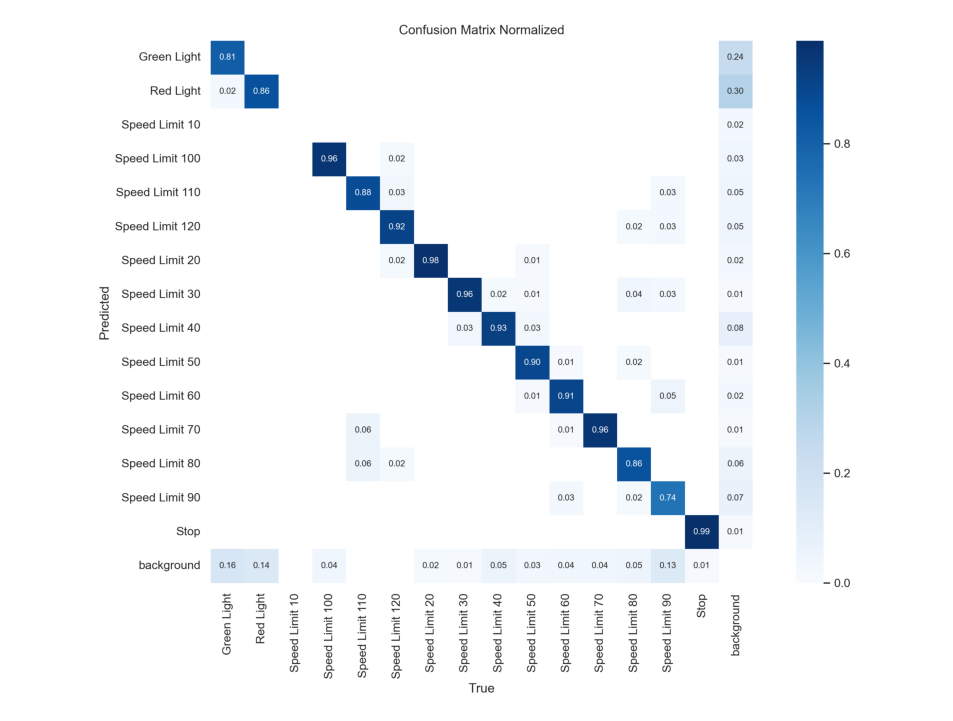

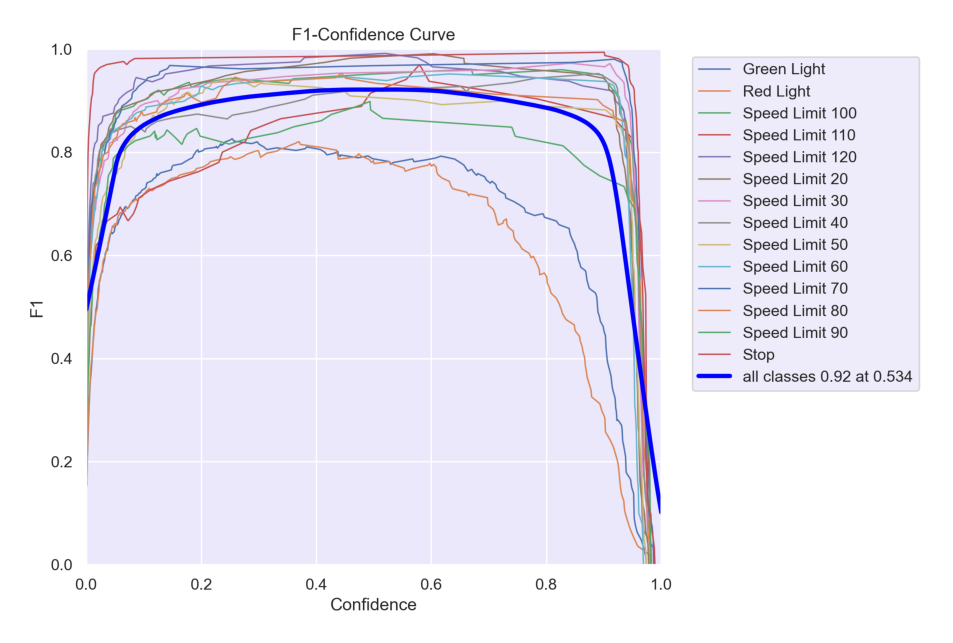

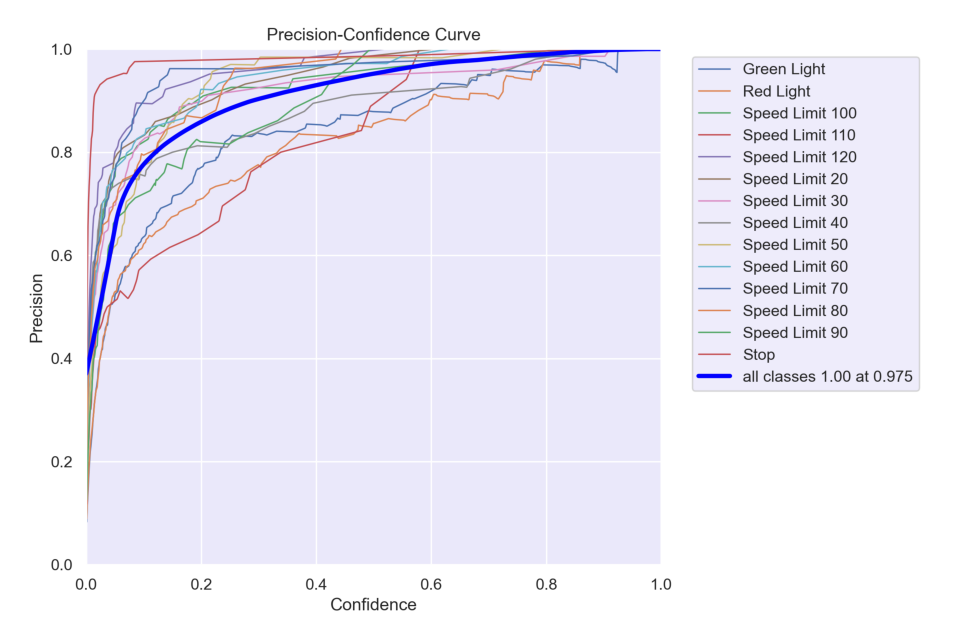

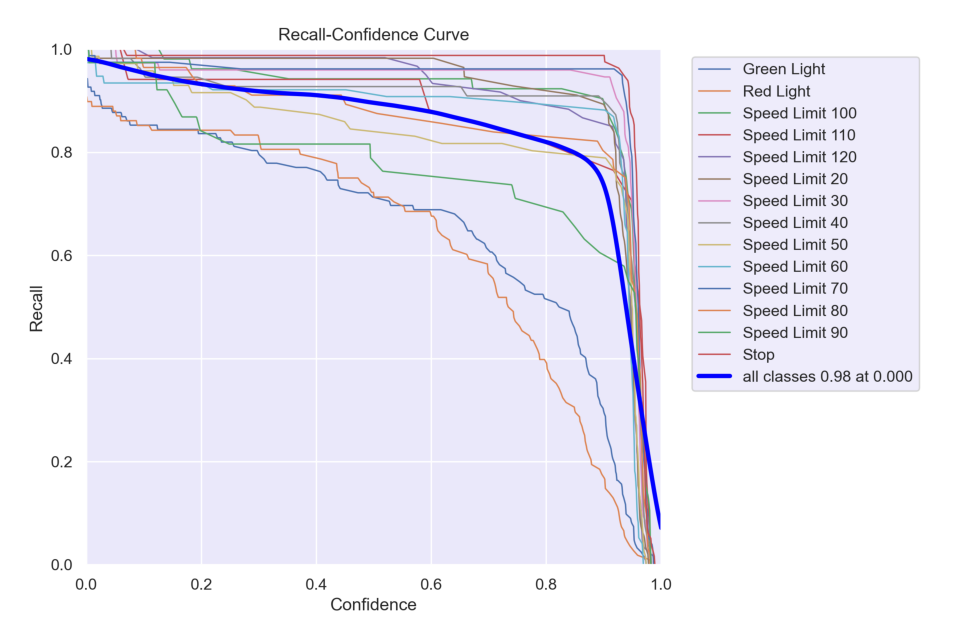

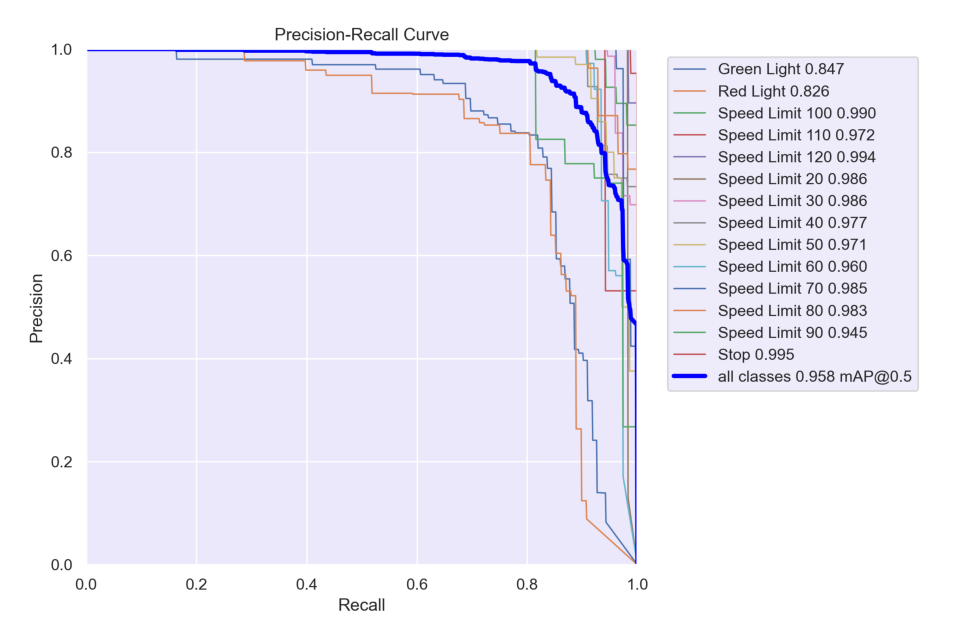

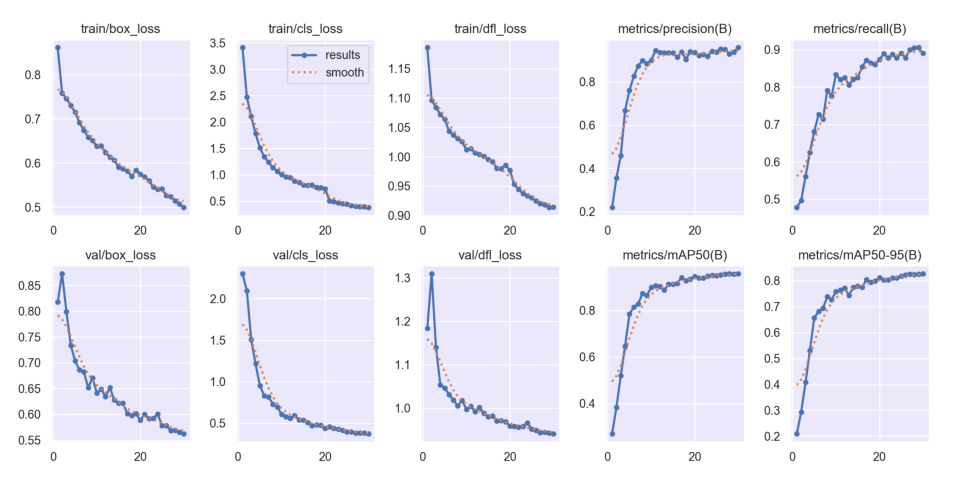

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

post_training_files_path = r"C:\Users\Emircan\Documents\Python\YolIsaretiTanimaSistemi\runs\detect\train2"

display_images(post_training_files_path, image_files)

In [5]:
Result_Final_model = pd.read_csv(r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\runs\detect\train\results.csv")
Result_Final_model.tail(10)

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
20     21  2289.32         0.59584         0.59935         0.96595   
21     22  2394.95         0.58367         0.57332         0.95425   
22     23  2499.97         0.58007         0.53789         0.95071   
23     24  2604.33         0.56851         0.51750         0.94190   
24     25  2708.43         0.56726         0.50272         0.94234   
25     26  2811.97         0.55536         0.49267         0.93518   
26     27  2916.43         0.55013         0.47200         0.93480   
27     28  3019.95         0.54405         0.46198         0.93310   
28     29  3125.39         0.53806         0.45112         0.92736   
29     30  3229.62         0.53126         0.43599         0.92220   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
20               0.93075            0.85474           0.92895   
21               0.92024            0.84384           0.92401   
22               0.91894            0.86458           0.93463   
23               0.95369            0.86367           0.94286   
24               0.96061            0.86448           0.94259   
25               0.96365            0.86087           0.94340   
26               0.96192            0.86999           0.95022   
27               0.95927            0.88271           0.95211   
28               0.95624            0.88377           0.95271   
29               0.95244            0.89098           0.95282   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
20              0.79214       0.63319       0.53192       0.97737  0.000179   
21              0.78997       0.62132       0.52492       0.96829  0.000161   
22              0.79724       0.62324       0.50160       0.97072  0.000144   
23              0.80871       0.60970       0.47965       0.96890  0.000127   
24              0.81069       0.59960       0.47139       0.95540  0.000109   
25              0.81265       0.60220       0.45495       0.95473  0.000092   
26              0.81743       0.59093       0.45148       0.95125  0.000075   
27              0.81936       0.59261       0.44113       0.94950  0.000057   
28              0.81909       0.59061       0.43117       0.94856  0.000040   
29              0.82117       0.58720       0.42200       0.94896  0.000023   

      lr/pg1    lr/pg2  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

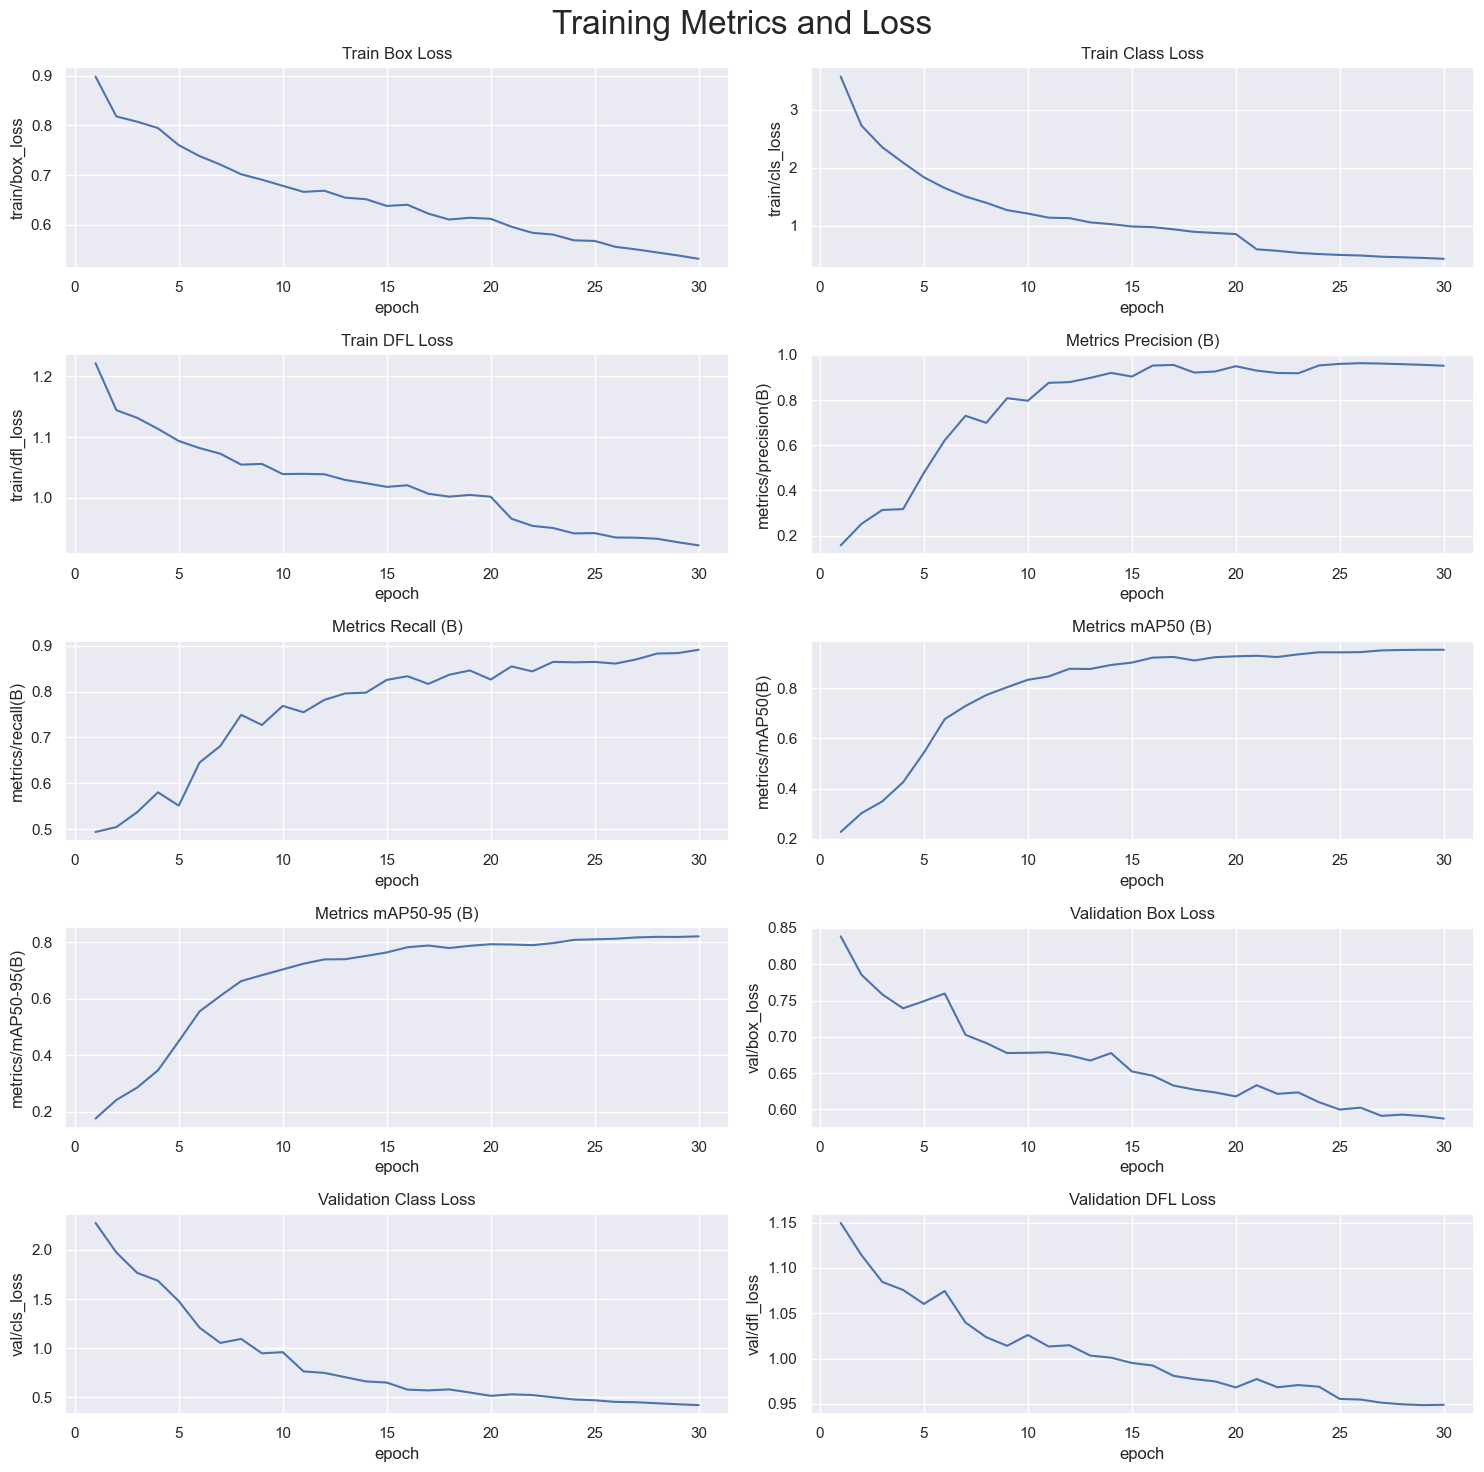

In [ ]:
Result_Final_model.columns = Result_Final_model.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
Valid_model = YOLO(r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\runs\detect\train\weights\best.pt")

metrics = Valid_model.val(split = 'val')

print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.116  Python-3.10.16 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 1.80.7 ms, read: 2.41.2 MB/s, size: 25.8 KB)


val: Scanning C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:24<00:00,  2.05it/s]


                   all        801        944      0.953      0.891      0.954      0.823
           Green Light         87        122      0.836      0.711       0.84      0.504
             Red Light         74        108      0.834      0.698      0.808      0.477
       Speed Limit 100         52         52       0.95      0.942      0.978      0.878
       Speed Limit 110         17         17      0.944          1      0.992      0.924
       Speed Limit 120         60         60          1      0.896      0.989      0.911
        Speed Limit 20         56         56          1      0.942      0.986      0.853
        Speed Limit 30         71         74      0.988      0.959      0.984       0.91
        Speed Limit 40         53         55      0.961      0.927      0.974       0.86
        Speed Limit 50         68         71      0.967      0.817      0.953      0.865
        Speed Limit 60         76         76      0.964      0.895      0.957      0.874
        Speed Limit 7


0: 640x640 1 Speed Limit 30, 60.2ms
Speed: 5.1ms preprocess, 60.2ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 59.6ms
Speed: 5.4ms preprocess, 59.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 16.3ms
Speed: 2.6ms preprocess, 16.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 10.2ms
Speed: 3.0ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 8.4ms
Speed: 2.6ms preprocess, 8.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 0.9ms

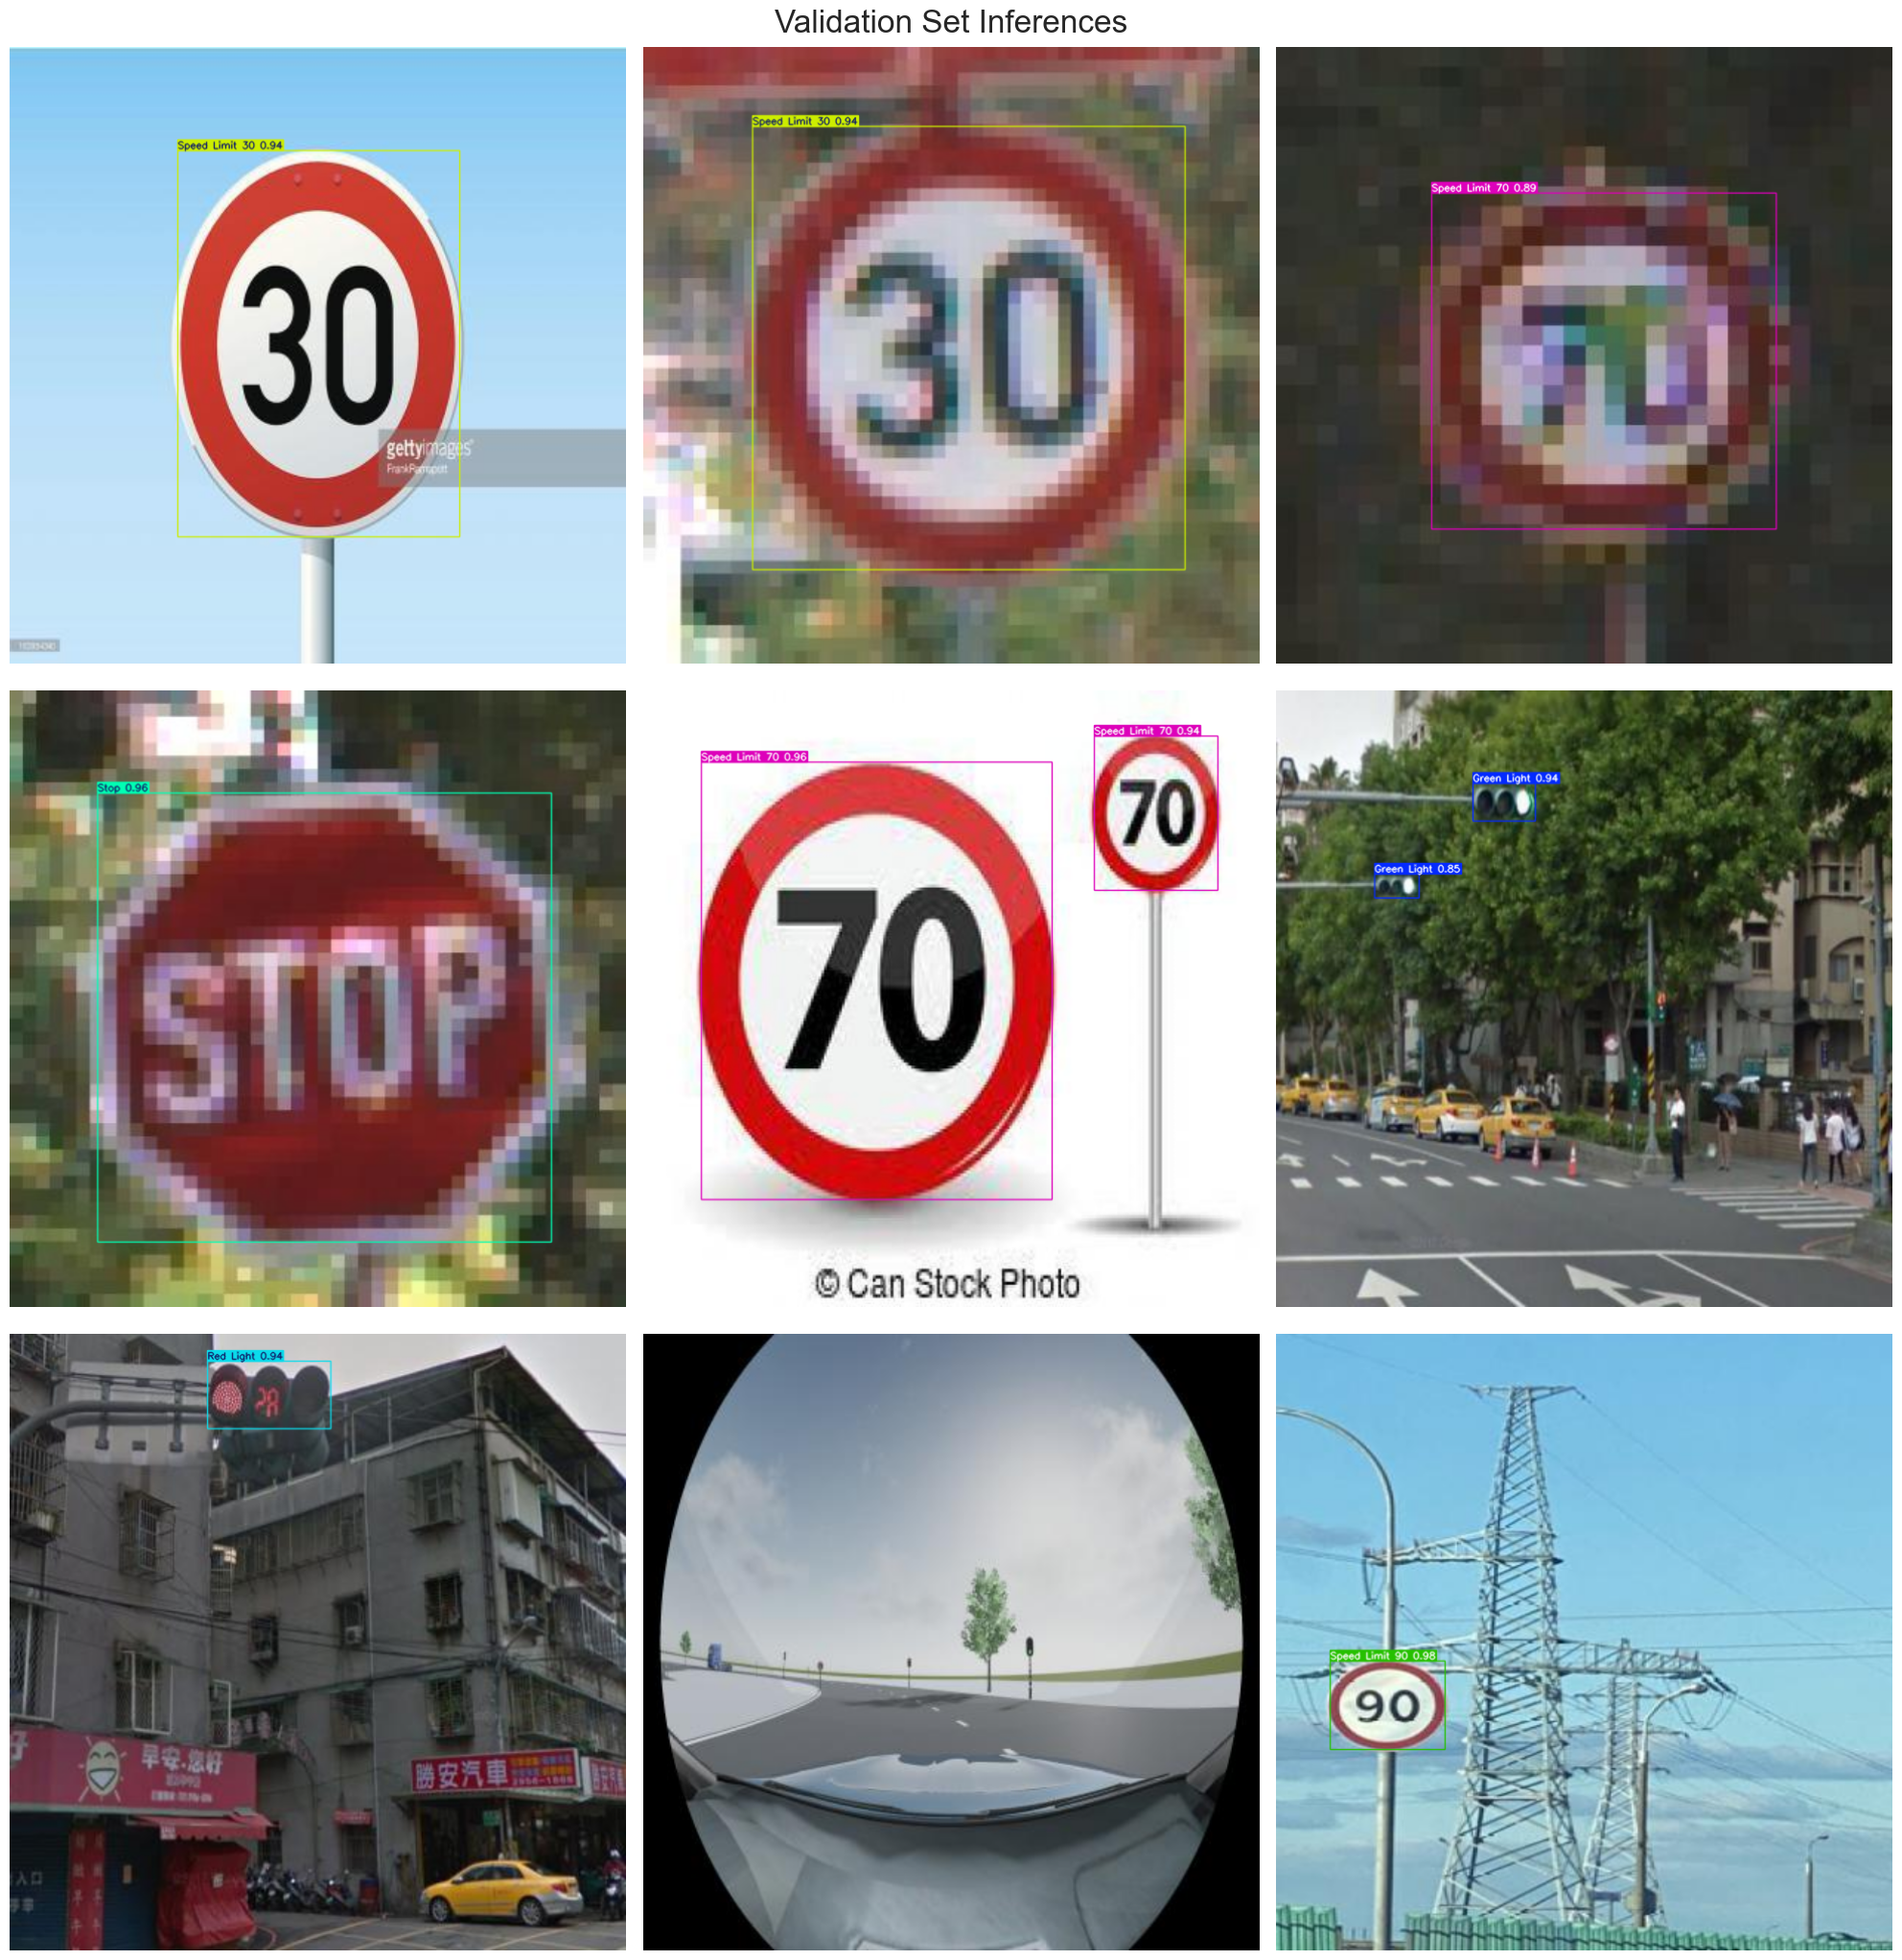

In [ ]:
def normalize_image(image):
    return image / 255.0

def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

dataset_path = r"C:\Users\Emircan\Documents\Python\Yol_Isareti_Tanima_Sistemi\data_set\car_detection"  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

if len(image_files) > 0:
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            image = cv2.imread(image_path)
            
            if image is not None:
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)
                
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()